# Dummy Q-learning algorithm

For each s,a initialize table entry Q(s,a) <- 0

    Observe current state s
    
    Do forever:
    
        Select an action a and execute it
        
        Receiver immediate reward r
        
        Observe the new state s'
        
        Update the table entry for Q(s,a) as follows:
        
$$
Q(s,a) =  r + max_a'Q(s',a')
$$

        s <- s`

[2017-03-01 21:16:51,638] Making new env: FrozenLake-v3


Success rate: 0.947
Final Q-Table Values
LEFT DOWN RIGHT UP
[[ 0.  1.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  0.]]


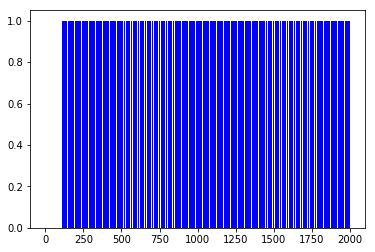

SFFF
FHFH
FFFH
HFFG
  (Right)


In [1]:
import gym
from gym.envs.registration import register
import sys, tty, termios
import numpy as np
import random as pr
import matplotlib.pyplot as plt

def rargmax(vector):
    m = np.amax(vector)
    indices = np.nonzero(vector == m)[0]
    return pr.choice(indices)

register(
    id='FrozenLake-v3',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name' : '4x4', 'is_slippery' : False}
)

env = gym.make('FrozenLake-v3')

Q = np.zeros([env.observation_space.n, env.action_space.n]) #For each s,a initialize table entry Q(s,a) <- 0

num_episodes = 2000
rList = []

for i in range(num_episodes):
    state = env.reset() #Observe current state s
    rAll = 0
    done = False

    while not done:
        action = rargmax(Q[state, :]) #Select an action a and execute it
        new_state, reward, done, _ = env.step(action)#Receiver immediate reward r
        Q[state,action] = reward + np.max(Q[new_state,:]) # Update the table entry for Q(s,a) as follows:
        rAll += reward
        state = new_state #Observe the new state s'
    rList.append(rAll)

   
print("Success rate: " + str(sum(rList)/num_episodes))
print("Final Q-Table Values")
print("LEFT DOWN RIGHT UP")
print(Q)
plt.bar(range(len(rList)),rList, color="blue")
plt.show()

env.render()


항상 큰 값만을 찾아가기 때문에 최적값을 찾지는 않는다. 
그리고 여러가지 방향을 가지 못함


# exploit vs exploration